In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = yf.download('BTC-USD','2015-01-01','2024-07-07')

[*********************100%%**********************]  1 of 1 completed


In [3]:
data = pd.DataFrame(data)

In [4]:
data.reset_index(inplace=True)

In [5]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [6]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3470,62029.015625
3471,60173.921875
3472,56977.703125
3473,56662.375000


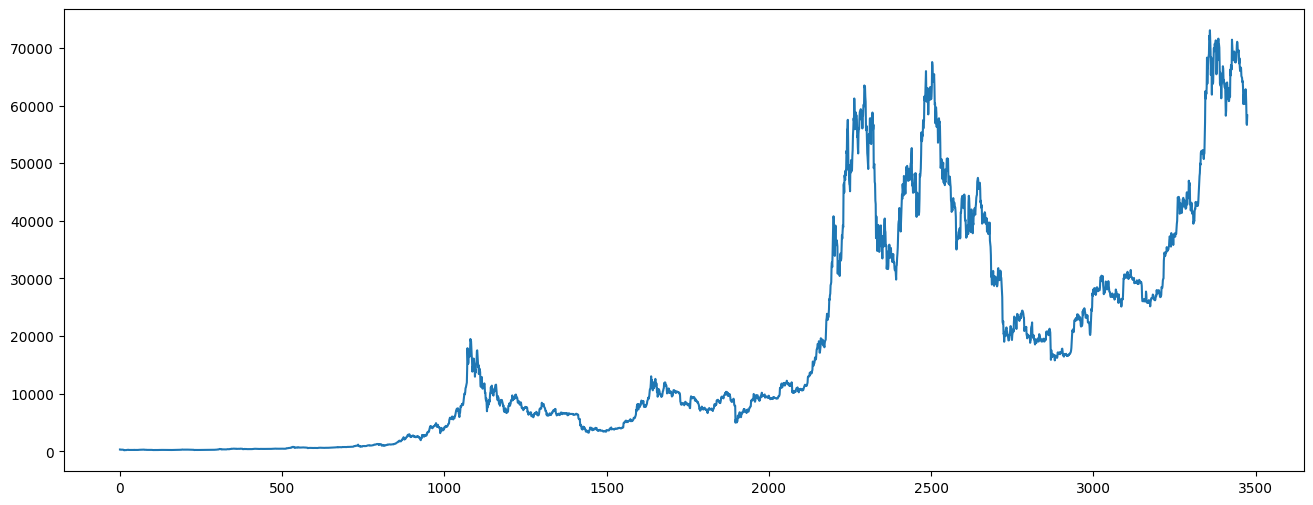

In [7]:
plt.figure(figsize=(16, 6))
plt.plot(data)
plt.show()

In [8]:
train_data = data[:-100]
test_data = data[-100:]

In [9]:
train_data.shape

(3375, 1)

In [10]:
test_data.shape

(100, 1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
train_data_scale = scaler.fit_transform(train_data)

In [13]:
base_days = 100

In [14]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [15]:
x, y = np.array(x), np.array(y)

In [16]:
x = np.reshape(x, (x.shape[0],x.shape[1], 1))

In [17]:
from keras.layers import LSTM, Dense, Dropout, MaxPooling1D, Conv1D
from keras.models import Sequential

In [18]:
model = Sequential()

model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [20]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [21]:
model.fit(x, y, epochs=50, verbose=1 )

Epoch 1/50
103/103 [==============================] - 36s 299ms/step - loss: 0.0156
Epoch 2/50
103/103 [==============================] - 31s 306ms/step - loss: 0.0058
Epoch 3/50
103/103 [==============================] - 32s 304ms/step - loss: 0.0044
Epoch 4/50
103/103 [==============================] - 31s 297ms/step - loss: 0.0042
Epoch 5/50
103/103 [==============================] - 31s 297ms/step - loss: 0.0041
Epoch 6/50
103/103 [==============================] - 31s 300ms/step - loss: 0.0034
Epoch 7/50
103/103 [==============================] - 32s 309ms/step - loss: 0.0032
Epoch 8/50
103/103 [==============================] - 31s 298ms/step - loss: 0.0032
Epoch 9/50
103/103 [==============================] - 31s 303ms/step - loss: 0.0029
Epoch 10/50
103/103 [==============================] - 30s 295ms/step - loss: 0.0028
Epoch 11/50
103/103 [==============================] - 30s 296ms/step - loss: 0.0028
Epoch 12/50
103/103 [==============================] - 32s 308ms/step - lo

In [22]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [23]:
train_data.tail(100)

,Close
3275,43652.250000
3276,43869.152344
3277,43997.902344
3278,43739.542969
3279,43016.117188
...,...
3370,67234.171875
3371,69958.812500
3372,69987.835938
3373,69455.343750


In [24]:
test_data

,Close
0,43652.250000
1,43869.152344
2,43997.902344
3,43739.542969
4,43016.117188
...,...
195,62029.015625
196,60173.921875
197,56977.703125
198,56662.375000


In [25]:
test_data_scale = scaler.transform(test_data)

In [26]:
x = []
y = []

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [27]:
x, y = np.array(x), np.array(y)

In [28]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [29]:
pred = model.predict(x)

4/4 [==============================] - 1s 69ms/step


In [30]:
pred = scaler.inverse_transform(pred)

In [31]:
pred

array([[62922.22 ],
       [63006.652],
       [62711.47 ],
       [62529.82 ],
       [62311.598],
       [61544.59 ],
       [60527.754],
       [59935.016],
       [59877.742],
       [60339.133],
       [61081.258],
       [62105.48 ],
       [62682.957],
       [62889.582],
       [62773.062],
       [62135.754],
       [60872.566],
       [59594.184],
       [58430.797],
       [57630.   ],
       [56954.31 ],
       [56713.26 ],
       [56951.98 ],
       [57624.61 ],
       [58407.035],
       [59283.156],
       [59971.44 ],
       [59993.637],
       [59548.85 ],
       [58856.758],
       [58139.35 ],
       [57545.625],
       [57299.24 ],
       [56927.383],
       [56130.594],
       [55211.64 ],
       [54964.105],
       [55668.76 ],
       [56912.348],
       [57962.637],
       [58371.8  ],
       [58041.11 ],
       [57560.09 ],
       [56920.195],
       [56278.81 ],
       [55876.336],
       [55975.242],
       [56273.125],
       [57223.293],
       [58381.926],


In [32]:
#future Bitcoin Price

In [33]:
m = y
z= []
future_days = 10
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 [==============================] - 0s 100ms/step


In [34]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [35]:
z

array([[53663.19847137],
       [52453.97610551],
       [51171.41038574],
       [49865.70053143],
       [48602.80254598],
       [47427.03184136],
       [46356.62213678],
       [45392.3816953 ],
       [44522.0822791 ],
       [43734.16485741]])

In [37]:
model.save('Bitcoin_Model1.h5')